In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras.models import load_model
import os
# import talib
import math

In [2]:
np.random.seed(7)

In [3]:
#load gdp data
df = pd.read_csv('GDP.csv', index_col=0)

In [4]:
df.tail()

,GDP
DATE,
2018-07-01,20749.752
2018-10-01,20897.804
2019-01-01,21098.827
2019-04-01,21340.267
2019-07-01,21542.104


In [5]:
#set look-back to 12 and forecast out to 2 
LOOK_BACK = 12
FORECAST_OUT = 2

In [6]:
# get rid of any nan values just in case
df.fillna(method='ffill', inplace=True)

In [7]:
# normalize (scale) values between 0 and 1

gdp_scaler = preprocessing.MinMaxScaler()

scaled_gdp = gdp_scaler.fit_transform(df[['GDP']].values)

scaled_data = pd.DataFrame(
    np.concatenate([scaled_gdp], axis=1), 
    columns=['GDP']
    )

scaled_data.dropna(inplace=True)

print(scaled_data.shape)

(291, 1)


In [8]:
# function for processing the data to make it compatible with LSTM model

def processData(data, lb, fc_out):

    if isinstance(data, pd.DataFrame):
        data = data.values

    X, y = [], []

    for i in range(len(data)-lb-1):

        if data.shape[1] > 1:
            X.append(data[i:(i+lb), :-1])

        elif data.shape[1] == 1:
            X.append(data[i:(i+lb), 0])

        y.append(data[(i+lb):(i+lb+fc_out), 0])

    X, y = np.array(X), np.array(y)

    if data.shape[1] == 1:
        X = X.reshape((X.shape[0], X.shape[1], 1))

    return X, y

In [9]:
#process the normalized (scaled) data

X, y = processData(scaled_data, LOOK_BACK, FORECAST_OUT)

print(f"X: {X.shape}\ny: {y.shape}")

X: (278, 12, 1)
y: (278, 2)


In [10]:
# load final model that we previously trained
model = load_model('./models/final_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# evaluate model
model.evaluate(X, y)

278/278 [==============================] - 0s 1ms/sample - loss: 6.0726e-04 - mean_squared_error: 6.0726e-04 - acc: 0.7374


[0.0006072563733239726, 0.00060725637, 0.73741007]

In [13]:
# define function for predicting based on input value
def predict(input_value):

    Xt = model.predict(input_value.reshape(1, input_value.shape[0], input_value.shape[1]))
 
    return gdp_scaler.inverse_transform(Xt)[0]

In [14]:
scaled_data = scaled_data["GDP"]

In [15]:
df = df["GDP"]

In [16]:
df

DATE
1947-01-01      243.164
1947-04-01      245.968
1947-07-01      249.585
1947-10-01      259.745
1948-01-01      265.742
                ...    
2018-07-01    20749.752
2018-10-01    20897.804
2019-01-01    21098.827
2019-04-01    21340.267
2019-07-01    21542.104
Name: GDP, Length: 291, dtype: float64

In [17]:
# data before predicting 7 quarters into the future
scaled_data

0      0.000000
1      0.000132
2      0.000301
3      0.000778
4      0.001060
         ...   
286    0.962799
287    0.969750
288    0.979188
289    0.990524
290    1.000000
Name: GDP, Length: 291, dtype: float64

In [18]:
#predict 7 quarters into the future

predicted_values = gdp_scaler.transform(predict(scaled_data.values[-LOOK_BACK:].reshape(-1,1)).reshape(-1,1)).reshape(1,-1)[0]
scaled_data[scaled_data.shape[0]] = predicted_values[0]
scaled_data[scaled_data.shape[0]] = predicted_values[1]

predicted_values = gdp_scaler.transform(predict(scaled_data.values[-LOOK_BACK:].reshape(-1,1)).reshape(-1,1)).reshape(1,-1)[0]
scaled_data[scaled_data.shape[0]] = predicted_values[0]
scaled_data[scaled_data.shape[0]] = predicted_values[1]

predicted_values = gdp_scaler.transform(predict(scaled_data.values[-LOOK_BACK:].reshape(-1,1)).reshape(-1,1)).reshape(1,-1)[0]
scaled_data[scaled_data.shape[0]] = predicted_values[0]

predicted_values = gdp_scaler.transform(predict(scaled_data.values[-LOOK_BACK:].reshape(-1,1)).reshape(-1,1)).reshape(1,-1)[0]
scaled_data[scaled_data.shape[0]] = predicted_values[0]

predicted_values = gdp_scaler.transform(predict(scaled_data.values[-LOOK_BACK:].reshape(-1,1)).reshape(-1,1)).reshape(1,-1)[0]
scaled_data[scaled_data.shape[0]] = predicted_values[0]


In [19]:
# data before predicting 7 quarters into the future
scaled_data

0      0.000000
1      0.000132
2      0.000301
3      0.000778
4      0.001060
         ...   
293    0.964765
294    1.003902
295    0.979023
296    0.983737
297    0.987955
Name: GDP, Length: 298, dtype: float64

In [20]:
# convert normalized data back into real world data
new_data = gdp_scaler.inverse_transform(scaled_data.values.reshape(-1,1))

In [21]:
new_data

array([[  243.164     ],
       [  245.968     ],
       [  249.585     ],
       [  259.745     ],
       [  265.742     ],
       [  272.567     ],
       [  279.196     ],
       [  280.366     ],
       [  275.034     ],
       [  271.351     ],
       [  272.889     ],
       [  270.627     ],
       [  280.828     ],
       [  290.383     ],
       [  308.153     ],
       [  319.945     ],
       [  336.        ],
       [  344.09      ],
       [  351.385     ],
       [  356.178     ],
       [  359.82      ],
       [  361.03      ],
       [  367.701     ],
       [  380.812     ],
       [  387.98      ],
       [  391.749     ],
       [  391.171     ],
       [  385.97      ],
       [  385.345     ],
       [  386.121     ],
       [  390.996     ],
       [  399.734     ],
       [  413.073     ],
       [  421.532     ],
       [  430.221     ],
       [  437.092     ],
       [  439.746     ],
       [  446.01      ],
       [  451.191     ],
       [  460.463     ],


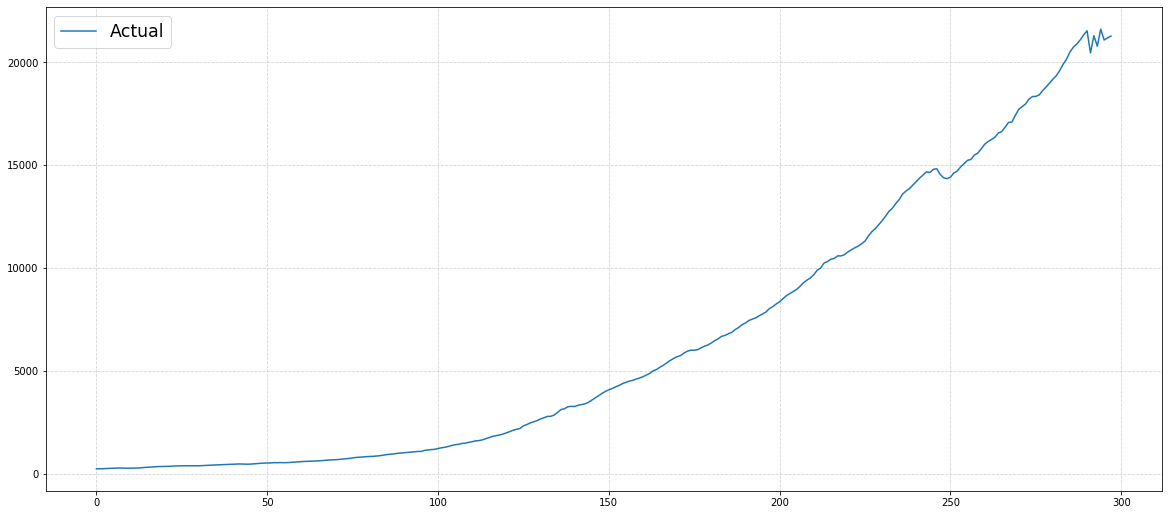

In [22]:
#plot the data
plt.figure(figsize=(20,15))

ax0 = plt.subplot2grid((10, 8), (0, 0), rowspan=6, colspan=8)

ax0.plot(new_data, label="Actual")

ax0.legend(fontsize="xx-large")
ax0.grid(True, linestyle='--', color='lightgray')

In [23]:
# load data array into pandas dataframe
new_df = pd.DataFrame(new_data, columns=['GDP'])

In [24]:
new_df = new_df[1:]

In [25]:
#function for finding gdp growth for a quarter
def get_gdp_growth(index):
    current_value = new_data[index][0]
    previous_value = new_data[index-1][0]
    
    return (math.pow(current_value / previous_value, 4) - 1) * 100

In [26]:
#load gdp growth data
gdp_pct_df = pd.read_csv('GDP_PCT.csv', index_col=0)

In [27]:
gdp_pct_df.tail()

,GDP
DATE,
2018-07-01,4.8
2018-10-01,2.9
2019-01-01,3.9
2019-04-01,4.7
2019-07-01,3.8


In [28]:
# copy gdp pct data to final_df
final_df = gdp_pct_df

# add the 7 predicted quarters to the gdp growth data
for i in range(-7, 0):
    final_df = final_df.append({'GDP': get_gdp_growth(i)}, ignore_index=True)
    
final_df.index = gdp_pct_df.index.append(pd.Index(["2019-10-01", "2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01", "2021-01-01", "2021-04-01"]))
new_df.index = gdp_pct_df.index.append(pd.Index(["2019-10-01", "2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01", "2021-01-01", "2021-04-01"]))

In [29]:
final_df.tail(10)

,GDP
2019-01-01,3.900000
2019-04-01,4.700000
2019-07-01,3.800000
2019-10-01,-18.488588
2020-01-01,17.337566
2020-04-01,-9.270814
2020-07-01,17.026945
2020-10-01,-9.446802
2021-01-01,1.917489
2021-04-01,1.706170


In [30]:
# print 2020 Q4 gdp growth value
print(f'2020 Q4 gdp growth is {final_df.values[-3][0]}%')

2020 Q4 gdp growth is -9.446802422992196%


In [31]:
# set index name to DATE
final_df.index.name = "DATE"
new_df.index.name = "DATE"

In [32]:
final_df

,GDP
DATE,
1947-04-01,4.700000
1947-07-01,6.000000
1947-10-01,17.300000
1948-01-01,9.600000
1948-04-01,10.700000
...,...
2020-04-01,-9.270814
2020-07-01,17.026945
2020-10-01,-9.446802


In [33]:
new_df.tail(10)

,GDP
DATE,
2019-01-01,21098.827000
2019-04-01,21340.267000
2019-07-01,21542.104000
2019-10-01,20468.816028
2020-01-01,21303.550564
2020-04-01,20791.639919
2020-07-01,21625.203962
2020-10-01,21095.322052
2021-01-01,21195.728052


In [34]:
# save final_df to final_gdp_pct.csv file
final_df.to_csv('final_gdp_pct.csv')

In [35]:
new_df.to_csv('final_gdp.csv')